In [1]:
import instaloader
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
nltk.download('punkt')
nltk.download('stopwords')

# Initialize Instaloader
loader = instaloader.Instaloader()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Elnaz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Elnaz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# def get_captions(account):
#     captions = []
#     profile = instaloader.Profile.from_username(loader.context, account)
#     for post in profile.get_posts():
#         if post.caption is not None:
#             captions.append(post.caption)
#     return captions


In [3]:
def get_captions(account, number=50):
    captions = []
    profile = instaloader.Profile.from_username(loader.context, account)
    for post in profile.get_posts():
        if post.caption is not None:
            captions.append(post.caption)
            if len(captions) >=number:
                break
    return captions


In [4]:
#function is for counting the num of word in the captions 
#remove in this function is a list of arbitrary word that you dont want to be counted by diagram  

def count_words(captions, remove=None):
    all_words = []
    for caption in captions:
        words = word_tokenize(caption.lower())
        all_words.extend(words)
    stop_words = set(stopwords.words('english'))
    
    # Add extra words to delete to the set of stopwords
    if remove:
        stop_words.update(remove)
    
    filtered_words = [word for word in all_words if word.isalnum() and word not in stop_words]
    word_counts = Counter(filtered_words)
    return word_counts



In [24]:
# account = 'leonardodicaprio'
account='jenniferaniston'
# account='mattyperry4'
# account='angelinajolie'
deleted_word= ['link', 'in', 'bio','lolavie','know','go']  # Add your extra words here
captions = get_captions(account)
word_counts = count_words(captions,deleted_word)


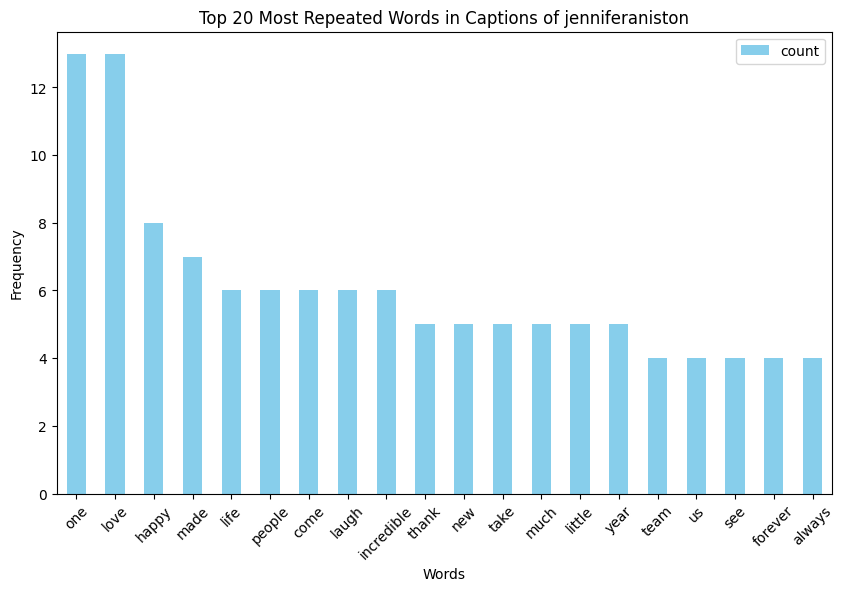

In [25]:
# Convert word counts to DataFrame
df_word_counts = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])
df_word_counts.index.name = 'word'
df_word_counts.sort_values(by='count', ascending=False, inplace=True)

# Plot the top N most repeated words
top_n = 20
df_word_counts.head(top_n).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title(f'Top {top_n} Most Repeated Words in Captions of {account}')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


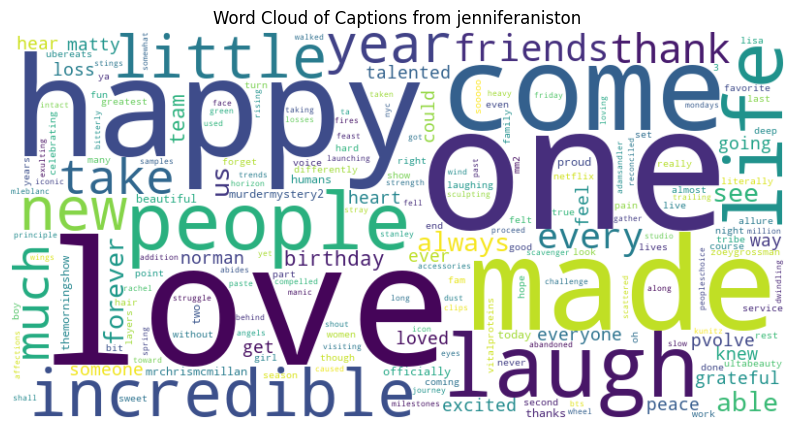

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a dictionary called word_counts with word frequencies

# Convert word counts to WordCloud format
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Word Cloud of Captions from {account}')
plt.axis('off')
plt.show()


In [27]:
top_n_words = df_word_counts.head(top_n).index.tolist()
top_n_words


['one',
 'love',
 'happy',
 'made',
 'life',
 'people',
 'come',
 'laugh',
 'incredible',
 'thank',
 'new',
 'take',
 'much',
 'little',
 'year',
 'team',
 'us',
 'see',
 'forever',
 'always']

In [28]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon (if not already downloaded)
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Example list of words

# Initialize total sentiment score
total_sentiment_score = 0

# Analyze sentiment of each word and sum up the scores
for word in top_n_words:
    sentiment_score = sia.polarity_scores(word)['compound']
    total_sentiment_score += sentiment_score

# Print the total sentiment score
print("Total Sentiment Score:", total_sentiment_score)


Total Sentiment Score: 2.1274


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Elnaz\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
